In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
# Definitions

# Directorio de imagenes
dir_img = './../imagenes/P2_4'

# Data files
data_file = './../data/P3_2_4.txt'

In [3]:
# Creamos el directorio de imagenes
if not os.path.exists(dir_img):
	os.mkdir(dir_img)
else :
	os.system("rm -r " + dir_img)
	os.mkdir(dir_img)

In [4]:
# Get lines from data files
file = open(data_file, 'r')

# Read data in blocks of 6 lines
blocks = []

for i, line in enumerate(file):
	if i % 6 == 0:
		blocks.append([])
	blocks[-1].append(line)

# Close file
file.close()


In [5]:
# Review blocks to get the desired data
row_data = []

for block in blocks:

	splited_1 = block[0].split()
	splited_2 = block[1].split()
	splited_3 = block[2].split()
	splited_4 = block[3].split()
	splited_5 = block[4].split()
	splited_6 = block[5].split()

	elements = splited_1[4]
	blocks = splited_1[9]
	threads = splited_1[-2]
	repts = splited_2[4]
	time_host = splited_2[-2]
	time_dev_malloc = splited_3[-2]
	time_host_to_dev = splited_4[-2]
	time_dev_kernel = splited_5[-2]
	time_dev_to_host = splited_6[-2]

	row_data.append({
		'elements': elements,
		'blocks': blocks,
		'threads': threads,
		'repts': repts,
		'time_host': time_host,					# MS
		'time_dev_malloc': time_dev_malloc,		# MS
		'time_host_to_dev': time_host_to_dev,	# MS
		'time_dev_kernel': time_dev_kernel,		# MS
		'time_dev_to_host': time_dev_to_host	# MS
	})


In [6]:
# Convert row data to pandas DataFrame
df = pd.DataFrame(row_data)

# Convert columns to numeric
df['elements'] = pd.to_numeric(df['elements'])
df['blocks'] = pd.to_numeric(df['blocks'])
df['threads'] = pd.to_numeric(df['threads'])
df['repts'] = pd.to_numeric(df['repts'])
df['time_host'] = pd.to_numeric(df['time_host'])
df['time_dev_malloc'] = pd.to_numeric(df['time_dev_malloc'])
df['time_host_to_dev'] = pd.to_numeric(df['time_host_to_dev'])
df['time_dev_kernel'] = pd.to_numeric(df['time_dev_kernel'])
df['time_dev_to_host'] = pd.to_numeric(df['time_dev_to_host'])

# Limit times to 2 decimal places
df['time_host'] = df['time_host'].round(2)
df['time_dev_malloc'] = df['time_dev_malloc'].round(3)
df['time_host_to_dev'] = df['time_host_to_dev'].round(3)
df['time_dev_kernel'] = df['time_dev_kernel'].round(3)
df['time_dev_to_host'] = df['time_dev_to_host'].round(3)

display(df)

# Latex code
# code = df.to_latex(index=False)
# print(code)

,elements,blocks,threads,repts,time_host,time_dev_malloc,time_host_to_dev,time_dev_kernel,time_dev_to_host
0,2600000000,10156250,256,1,9900.67,555.954,1955.851,22.803,4602.516
1,2610000000,10195313,256,1,9984.18,225.951,1771.364,22.862,2385.768
2,2620000000,10234375,256,1,9986.72,357.831,2000.949,22.958,4736.385
3,2630000000,10273438,256,1,10028.49,626.138,1938.029,23.039,4760.630
4,2640000000,10312500,256,1,10043.43,240.826,1985.460,23.129,4767.677
...,...,...,...,...,...,...,...,...,...
84,3440000000,13437500,256,1,14756.54,367.337,2515.449,30.127,7386.398
85,3450000000,13476563,256,1,13211.15,393.155,2319.341,30.202,3144.503
86,3460000000,13515625,256,1,14751.54,385.405,2520.770,30.328,7206.896
87,3470000000,13554688,256,1,13845.11,303.114,2572.928,30.394,6793.543


In [7]:
# Remove atipical values using quantiles

# Host time
q1 = df['time_host'].quantile(0.25)
q3 = df['time_host'].quantile(0.75)

iqr = q3 - q1

df = df[(df['time_host'] >= q1 - 1.5 * iqr) & (df['time_host'] <= q3 + 1.5 * iqr)]

# Device malloc time
q1 = df['time_dev_malloc'].quantile(0.25)
q3 = df['time_dev_malloc'].quantile(0.75)

iqr = q3 - q1

df = df[(df['time_dev_malloc'] >= q1 - 1.5 * iqr) & (df['time_dev_malloc'] <= q3 + 1.5 * iqr)]

# Host to device time
q1 = df['time_host_to_dev'].quantile(0.25)
q3 = df['time_host_to_dev'].quantile(0.75)

iqr = q3 - q1

df = df[(df['time_host_to_dev'] >= q1 - 1.5 * iqr) & (df['time_host_to_dev'] <= q3 + 1.5 * iqr)]

# Device kernel time
q1 = df['time_dev_kernel'].quantile(0.25)
q3 = df['time_dev_kernel'].quantile(0.75)

iqr = q3 - q1

df = df[(df['time_dev_kernel'] >= q1 - 1.5 * iqr) & (df['time_dev_kernel'] <= q3 + 1.5 * iqr)]

# Device to host time
q1 = df['time_dev_to_host'].quantile(0.25)
q3 = df['time_dev_to_host'].quantile(0.75)

iqr = q3 - q1

df = df[(df['time_dev_to_host'] >= q1 - 1.5 * iqr) & (df['time_dev_to_host'] <= q3 + 1.5 * iqr)]

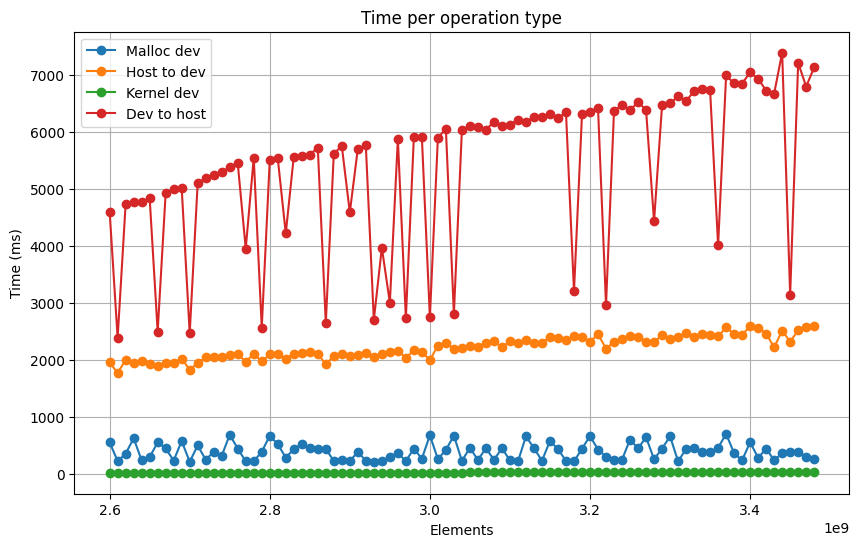

In [8]:
# Get max time per row with title and value
x_values = df['elements']

y_values_1 = df['time_dev_malloc']
y_values_2 = df['time_host_to_dev']
y_values_3 = df['time_dev_kernel']
y_values_4 = df['time_dev_to_host']

# Plot
plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_1, label='Malloc dev', marker='o')
plt.plot(x_values, y_values_2, label='Host to dev', marker='o')
plt.plot(x_values, y_values_3, label='Kernel dev', marker='o')
plt.plot(x_values, y_values_4, label='Dev to host', marker='o')

plt.xlabel('Elements')
plt.ylabel('Time (ms)')

plt.title('Time per operation type')

plt.legend()
plt.grid()

plt.savefig(dir_img + '/time_per_operation_type.png')

plt.show()


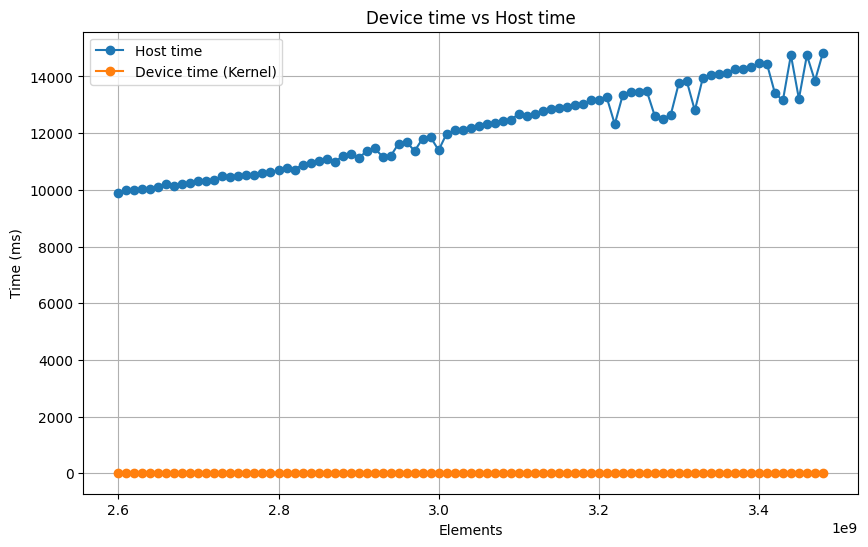

In [9]:
# Plot device time vs host time

plt.figure(figsize=(10, 6))

x_values = df['elements']
y_values_1 = df['time_host']
y_values_2 = df['time_dev_kernel']

plt.plot(x_values, y_values_1, label='Host time', marker='o')
plt.plot(x_values, y_values_2, label='Device time (Kernel)', marker='o')

plt.title('Device time vs Host time')

plt.xlabel('Elements')
plt.ylabel('Time (ms)')

plt.grid()
plt.legend()

plt.savefig(dir_img + '/device_vs_host_time.png')

plt.show()

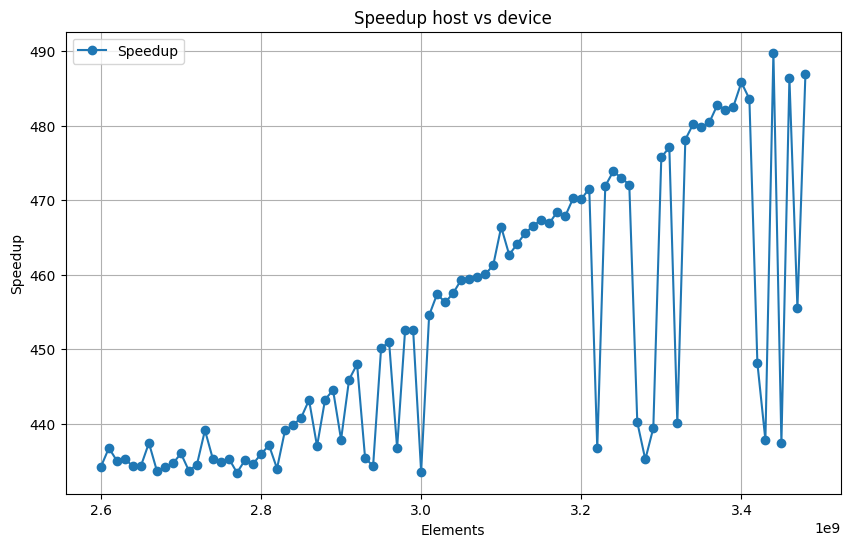

In [10]:
# Acelearation plot

plt.figure(figsize=(10, 6))

x_values = df['elements']
y_values_1 = df['time_host']
y_values_2 = df['time_dev_kernel']

acelearation = y_values_1 / y_values_2

plt.plot(x_values, acelearation, label='Speedup', marker='o')

plt.xlabel('Elements')
plt.ylabel('Speedup')

plt.title('Speedup host vs device')

plt.grid()
plt.legend()

plt.savefig(dir_img + '/speedup_vs_elements.png')

plt.show()

In [11]:
# Table with % of time per operation type

new_df = pd.DataFrame()

new_df['elements'] = df['elements']

new_df['total_time'] = df['time_dev_malloc'] + df['time_host_to_dev'] + df['time_dev_kernel'] + df['time_dev_to_host']

new_df['%_time_dev_malloc'] = (df['time_dev_malloc'] / new_df['total_time']) * 100
new_df['%_time_host_to_dev'] = (df['time_host_to_dev'] / new_df['total_time']) * 100
new_df['%_time_dev_kernel'] = (df['time_dev_kernel'] / new_df['total_time']) * 100
new_df['%_time_dev_to_host'] = (df['time_dev_to_host'] / new_df['total_time']) * 100

new_df['%_time_dev_malloc'] = new_df['%_time_dev_malloc'].round(2)
new_df['%_time_host_to_dev'] = new_df['%_time_host_to_dev'].round(2)
new_df['%_time_dev_kernel'] = new_df['%_time_dev_kernel'].round(2)
new_df['%_time_dev_to_host'] = new_df['%_time_dev_to_host'].round(2)

display(new_df)

# Latex code
# code = new_df.to_latex(index=False)
# print(code)

,elements,total_time,%_time_dev_malloc,%_time_host_to_dev,%_time_dev_kernel,%_time_dev_to_host
0,2600000000,7137.124,7.79,27.40,0.32,64.49
1,2610000000,4405.945,5.13,40.20,0.52,54.15
2,2620000000,7118.123,5.03,28.11,0.32,66.54
3,2630000000,7347.836,8.52,26.38,0.31,64.79
4,2640000000,7017.092,3.43,28.29,0.33,67.94
...,...,...,...,...,...,...
84,3440000000,10299.311,3.57,24.42,0.29,71.72
85,3450000000,5887.201,6.68,39.40,0.51,53.41
86,3460000000,10143.399,3.80,24.85,0.30,71.05
87,3470000000,9699.979,3.12,26.53,0.31,70.04


In [12]:
# Table with percentage improvement device vs host

new_df = pd.DataFrame()

new_df['elements'] = df['elements']

new_df['time_host'] = df['time_host']
new_df['time_dev_kernel'] = df['time_dev_kernel']

new_df['%_improvement'] = ((new_df['time_host'] / new_df['time_dev_kernel']) - 1) * 100

new_df['%_improvement'] = new_df['%_improvement'].round(2)

display(new_df)

# Latex code
# code = new_df.to_latex(index=False)
# print(code)

,elements,time_host,time_dev_kernel,%_improvement
0,2600000000,9900.67,22.803,43318.28
1,2610000000,9984.18,22.862,43571.51
2,2620000000,9986.72,22.958,43399.96
3,2630000000,10028.49,23.039,43428.32
4,2640000000,10043.43,23.129,43323.54
...,...,...,...,...
84,3440000000,14756.54,30.127,48881.11
85,3450000000,13211.15,30.202,43642.63
86,3460000000,14751.54,30.328,48540.00
87,3470000000,13845.11,30.394,45452.12
